# LAB-6

### *Car Price Prediction using PCA*

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Getting our Data

In [2]:
df = pd.read_csv(r'../Dataset/CarPrice_1.csv', encoding = 'unicode_escape')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Data Preprocessing

In [3]:
# checking for null values
df.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [4]:
# checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# label encoding 'object' type attributes
label_encoder = preprocessing.LabelEncoder()
cols_tbe = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem', 'enginetype', 'cylindernumber']
for col_tbe in cols_tbe:
    df[col_tbe] = df[col_tbe].astype('|S')
    df[col_tbe] = label_encoder.fit_transform(df[col_tbe])
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


### Splitting the Predictor and Target attributes

In [6]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [7]:
X

array([[ 1.00e+00,  3.00e+00,  2.00e+00, ...,  5.00e+03,  2.10e+01,
         2.70e+01],
       [ 2.00e+00,  3.00e+00,  3.00e+00, ...,  5.00e+03,  2.10e+01,
         2.70e+01],
       [ 3.00e+00,  1.00e+00,  1.00e+00, ...,  5.00e+03,  1.90e+01,
         2.60e+01],
       ...,
       [ 2.03e+02, -1.00e+00,  1.40e+02, ...,  5.50e+03,  1.80e+01,
         2.30e+01],
       [ 2.04e+02, -1.00e+00,  1.42e+02, ...,  4.80e+03,  2.60e+01,
         2.70e+01],
       [ 2.05e+02, -1.00e+00,  1.43e+02, ...,  5.40e+03,  1.90e+01,
         2.50e+01]])

In [8]:
y

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

In [9]:
X.shape

(205, 25)

In [10]:
y.shape

(205,)

### Performing Dimensionality Reduction using Principal Component Ananlysis

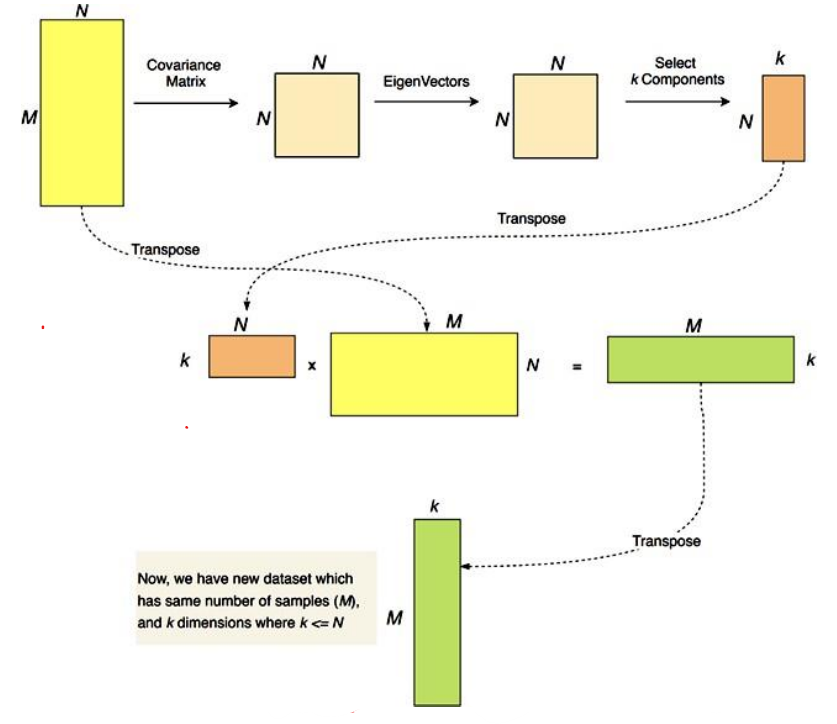

### <span style="color:purple">Step 1: Standardization</span>

<img height = 400 width = 500 src = "https://ashutoshtripathicom.files.wordpress.com/2019/07/standardization-1.png">

In [11]:
X_std = preprocessing.StandardScaler().fit_transform(X)

In [30]:
X_std

array([[-1.72362229,  1.74347043, -1.83822103, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-1.70672403,  1.74347043, -1.81377978, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-1.68982577,  0.133509  , -1.86266229, ..., -0.26296022,
        -0.95301169, -0.69162706],
       ...,
       [ 1.68982577, -1.47645244,  1.53467254, ...,  0.78785546,
        -1.10624102, -1.12833203],
       [ 1.70672403, -1.47645244,  1.58355505, ..., -0.68328649,
         0.11959362, -0.54605874],
       [ 1.72362229, -1.47645244,  1.60799631, ...,  0.57769233,
        -0.95301169, -0.83719538]])

### <span style="color:purple">Step 2: Computing Eigenvectors and Eigenvalues</span>

In [12]:
# covariance matrix
cov_m = np.cov(X_std, rowvar=False)
cov_m

array([[ 1.00490196, -0.15236438,  0.97181745, -0.12618368,  0.06806082,
        -0.19128463,  0.09878487,  0.05165849,  0.05173573,  0.13036471,
         0.17147285,  0.0526434 ,  0.25721475,  0.07231432, -0.07549816,
        -0.04111214, -0.03409616,  0.20590196,  0.2613385 , -0.16161197,
         0.15101255, -0.01507912, -0.20478817,  0.01601817,  0.01131049],
       [-0.15236438,  1.00490196, -0.10761971,  0.19526344, -0.06015951,
         0.66732871, -0.59905749, -0.04187575,  0.21351246, -0.5345613 ,
        -0.35936452, -0.23406082, -0.54369035, -0.22880672,  0.05061936,
         0.19873093, -0.10630829,  0.09160994, -0.13068887, -0.00877796,
        -0.17939016,  0.07122014,  0.27494745, -0.03599823,  0.03477564],
       [ 0.97181745, -0.10761971,  1.00490196, -0.06977541,  0.02001201,
        -0.17258738,  0.10017981, -0.01620761,  0.0562425 ,  0.0146209 ,
         0.05327553, -0.07571872,  0.20289008, -0.04964915, -0.09082397,
         0.04738467, -0.15473707,  0.12445178,  0

In [13]:
cov_m.shape

(25, 25)

In [14]:
# printing out eigen vectors & values
cov_m = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_m)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-5.30611967e-02 -1.57807286e-01  2.81151622e-01 -5.36816085e-01
  -1.30369978e-01  3.73228940e-02 -5.22564472e-02 -1.07382910e-01
   1.62519547e-01 -1.04721557e-01  1.21815810e-01  1.88453320e-02
  -1.19752853e-01  8.62807508e-03  3.11407215e-02 -5.03237074e-02
  -8.94974269e-02  2.25166814e-02 -4.37665265e-02  7.48722493e-02
  -3.25272657e-01  6.09121817e-01  8.61359339e-02  3.98669682e-02
  -6.55735489e-03]
 [ 1.02630305e-01  3.13557681e-01 -1.88925327e-01 -1.89998023e-01
  -1.14911568e-01 -1.31096228e-02 -9.85192689e-02 -3.12061362e-02
  -1.22079760e-01 -3.73236402e-01 -4.59759067e-01 -3.66083364e-02
   1.76400756e-01  3.19642584e-01  2.91091140e-02 -4.61163996e-01
  -3.28129951e-02 -2.10487183e-01 -1.26032387e-01  2.80891380e-03
   2.85130574e-02  3.73267762e-02 -4.77459873e-02  5.58738123e-02
   1.12619269e-01]
 [-7.91380179e-03 -1.46211590e-01  3.07679195e-01 -5.40169407e-01
  -1.19606650e-01  1.02802229e-01 -3.30622326e-02 -1.02452909e-01
   1.58555269e-01 -5.287

In [15]:
eig_vecs.shape

(25, 25)

In [16]:
eig_vals.shape

(25,)

### <span style="color:purple">Step 3: Selecting the Principal Components</span>

In [17]:
# making a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print(type(eig_pairs))

# sorting the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()
print("\n",eig_pairs)

# printing out the list
print('\n\n\nEigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

<class 'list'>

 [(7.780655391499416, array([-0.0530612 ,  0.1026303 , -0.0079138 ,  0.06343377, -0.12335074,
        0.0934437 , -0.06354175, -0.21485835, -0.02205021, -0.29682597,
       -0.331544  , -0.31851996, -0.12469793, -0.34640945,  0.02036869,
        0.02740123, -0.29584763, -0.24357732, -0.26026378, -0.05581794,
       -0.03835019, -0.27209385,  0.09035767,  0.28600916,  0.29757867])), (4.260893548724666, array([-0.15780729,  0.31355768, -0.14621159,  0.30075472, -0.07556525,
        0.31867252, -0.3031372 ,  0.10507454,  0.17230812, -0.1891876 ,
       -0.09295233, -0.02295248, -0.32598997,  0.01247936,  0.08733365,
        0.16072567,  0.11009256,  0.14185297,  0.04254707, -0.03035232,
       -0.29939384,  0.25262775,  0.25936598, -0.22350881, -0.18590188])), (2.2565333104890026, array([ 0.28115162, -0.18892533,  0.30767919,  0.42985834, -0.24502515,
       -0.2491698 ,  0.25203116, -0.11824882,  0.00400041,  0.01082356,
        0.05231269, -0.08553813,  0.181645  , -0.06

In [18]:
# calculating 'explained variance' to get the minimum number of attributes that can retain maximum percentage of knowledge
tot = sum(eig_vals)
print("Sum of Eigen values:",tot)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("\n1. Variance Explained:\n",var_exp)
cum_var_exp = np.cumsum(var_exp)
print("\n2. Cumulative Variance Explained:\n",cum_var_exp)
print("\n3. Percentage of variance the first 15 principal components each contain:\n ",var_exp[0:15])
print("\n4. Percentage of variance the first 15 principal components together contain:\n",sum(var_exp[0:15]))

Sum of Eigen values: 25.122549019607856

1. Variance Explained:
 [30.97080389982205, 16.960434808582075, 8.982103323702562, 8.404321755320804, 5.285297840576634, 4.383624894032126, 4.040658206735957, 3.742980328957345, 3.0613664083480825, 2.381015414017241, 2.0950883683838626, 1.8335597203411662, 1.5257195748795802, 1.4657036048002698, 1.2444220635926402, 0.9623918035973674, 0.7871223649707415, 0.7152045282744195, 0.38349376710792116, 0.28089979145801325, 0.2033949008754407, 0.13248732782632425, 0.077497657932911, 0.06134031580867989, 0.019067330055822233]

2. Cumulative Variance Explained:
 [ 30.9708039   47.93123871  56.91334203  65.31766379  70.60296163
  74.98658652  79.02724473  82.77022506  85.83159147  88.21260688
  90.30769525  92.14125497  93.66697454  95.13267815  96.37710021
  97.33949202  98.12661438  98.84181891  99.22531268  99.50621247
  99.70960737  99.8420947   99.91959235  99.98093267 100.        ]

3. Percentage of variance the first 15 principal components each cont

### <span style="color:purple">Step 4: Constructing the Projection Matrix W from the selected k eigen vectors</span>

In [19]:
# selecting first 15 principal components (k=15)
# here we are reducing the 25-dimensional feature space to a 15-dimensional feature subspace

matrix_w = np.hstack((eig_pairs[0][1].reshape(25,1), 
                      eig_pairs[1][1].reshape(25,1),
                      eig_pairs[2][1].reshape(25,1),
                      eig_pairs[3][1].reshape(25,1),
                      eig_pairs[4][1].reshape(25,1),
                      eig_pairs[5][1].reshape(25,1),
                      eig_pairs[6][1].reshape(25,1),
                      eig_pairs[7][1].reshape(25,1),
                      eig_pairs[8][1].reshape(25,1),
                      eig_pairs[9][1].reshape(25,1),
                      eig_pairs[10][1].reshape(25,1),
                      eig_pairs[11][1].reshape(25,1),
                      eig_pairs[12][1].reshape(25,1),
                      eig_pairs[13][1].reshape(25,1),
                      eig_pairs[14][1].reshape(25,1)))

# hstack: for stacking arrays in sequence horizontally (column wise)
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.0530612  -0.15780729  0.28115162 -0.53681608 -0.13036998  0.03732289
  -0.05225645 -0.10738291  0.16251955 -0.10472156  0.12181581  0.01884533
  -0.11975285  0.00862808  0.03114072]
 [ 0.1026303   0.31355768 -0.18892533 -0.18999802 -0.11491157 -0.01310962
  -0.09851927 -0.03120614 -0.12207976 -0.3732364  -0.45975907 -0.03660834
   0.17640076  0.31964258  0.02910911]
 [-0.0079138  -0.14621159  0.30767919 -0.54016941 -0.11960665  0.10280223
  -0.03306223 -0.10245291  0.15855527 -0.05287005  0.0687729   0.02773764
  -0.12285491  0.06851904  0.03529164]
 [ 0.06343377  0.30075472  0.42985834  0.18421945 -0.15860263 -0.08630833
   0.02501238 -0.11627602  0.08854286  0.13806603 -0.0146322   0.10721662
  -0.03961976 -0.07348241 -0.0429382 ]
 [-0.12335074 -0.07556525 -0.24502515 -0.09388303 -0.25699314  0.25018326
  -0.52472881  0.28474162 -0.26283937  0.37137005  0.14272723  0.20469235
  -0.11287209 -0.09504438  0.00393131]
 [ 0.0934437   0.31867252 -0.2491698  -0.16050996 -0.1

In [20]:
matrix_w.shape

(25, 15)

### <span style="color:purple"> Step 5: Projecting onto the New Feature Space</span>

In [21]:
Y = X_std.dot(matrix_w)
principalDf = pd.DataFrame(data = Y, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0.838260,3.894508,-1.917195,-0.207639,-1.461735,-1.377403,2.062071,-0.208143,-2.765365,1.235966,-1.048865,-1.239876,0.581495,-0.195411,1.245938
1,0.837170,3.888268,-1.904924,-0.229913,-1.466861,-1.374260,2.060379,-0.212462,-2.758743,1.232904,-1.045125,-1.238880,0.576469,-0.193590,1.247327
2,-0.241899,2.832337,-1.593560,1.815639,1.499804,0.679208,-0.351206,-0.863257,0.344517,-0.710123,-0.024281,-0.360312,-0.799293,-2.356916,-0.443049
3,0.270004,0.594281,-0.401089,2.349924,-0.128928,0.442917,-0.040355,0.753874,-0.134935,-0.931655,-0.902956,-0.705287,1.187760,-0.105276,0.153233
4,-0.585233,0.946251,0.073819,2.982460,-1.054990,-0.607461,-1.285642,1.314349,0.406433,-1.315987,-1.336346,-1.044222,0.403771,0.374968,0.526998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-3.208494,-1.190565,2.183084,-1.066216,0.016857,0.137163,0.884678,-0.481550,0.191273,-0.234157,1.365461,0.300245,0.702504,0.196197,0.087080
201,-4.213526,-0.864031,1.702951,-1.256510,-0.692030,0.798580,-0.668550,0.350879,-0.433698,0.929324,1.598493,0.745142,-0.018232,-0.038301,0.078727
202,-3.710446,-0.207053,2.784065,-0.981998,1.849189,0.558201,-0.240878,-0.870227,0.019057,-0.783021,1.515955,0.106606,-0.184430,-0.386650,0.207996
203,-3.078550,-3.960742,-2.037249,-2.217478,1.092129,2.250524,-0.226354,0.183709,-0.297421,-0.667195,1.066089,-0.000701,-1.632661,-0.707738,1.028794


In [22]:
principalDf.shape

(205, 15)

### <span style="color:purple"> Step 6: Getting the final Dataset</span>

In [23]:
final_df = pd.concat([principalDf, pd.DataFrame(y, columns=['price'])], axis = 1)
final_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,price
0,0.838260,3.894508,-1.917195,-0.207639,-1.461735,-1.377403,2.062071,-0.208143,-2.765365,1.235966,-1.048865,-1.239876,0.581495,-0.195411,1.245938,13495.0
1,0.837170,3.888268,-1.904924,-0.229913,-1.466861,-1.374260,2.060379,-0.212462,-2.758743,1.232904,-1.045125,-1.238880,0.576469,-0.193590,1.247327,16500.0
2,-0.241899,2.832337,-1.593560,1.815639,1.499804,0.679208,-0.351206,-0.863257,0.344517,-0.710123,-0.024281,-0.360312,-0.799293,-2.356916,-0.443049,16500.0
3,0.270004,0.594281,-0.401089,2.349924,-0.128928,0.442917,-0.040355,0.753874,-0.134935,-0.931655,-0.902956,-0.705287,1.187760,-0.105276,0.153233,13950.0
4,-0.585233,0.946251,0.073819,2.982460,-1.054990,-0.607461,-1.285642,1.314349,0.406433,-1.315987,-1.336346,-1.044222,0.403771,0.374968,0.526998,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-3.208494,-1.190565,2.183084,-1.066216,0.016857,0.137163,0.884678,-0.481550,0.191273,-0.234157,1.365461,0.300245,0.702504,0.196197,0.087080,16845.0
201,-4.213526,-0.864031,1.702951,-1.256510,-0.692030,0.798580,-0.668550,0.350879,-0.433698,0.929324,1.598493,0.745142,-0.018232,-0.038301,0.078727,19045.0
202,-3.710446,-0.207053,2.784065,-0.981998,1.849189,0.558201,-0.240878,-0.870227,0.019057,-0.783021,1.515955,0.106606,-0.184430,-0.386650,0.207996,21485.0
203,-3.078550,-3.960742,-2.037249,-2.217478,1.092129,2.250524,-0.226354,0.183709,-0.297421,-0.667195,1.066089,-0.000701,-1.632661,-0.707738,1.028794,22470.0


In [24]:
final_df.shape

(205, 16)

### Splitting Data for Training and Testing

In [25]:
data = final_df.values
X,y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)  # splitting in the ration 70:30

### Model

In [26]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

### Making Predictions and Checking Accuracy

In [27]:
y_pred = regr.predict(X_test)

In [28]:
print('R2 Score:',r2_score(y_test, y_pred))

R2 Score: 0.8315252431797888


# Predictions are 83.15% accurate.

### Visualizing the results

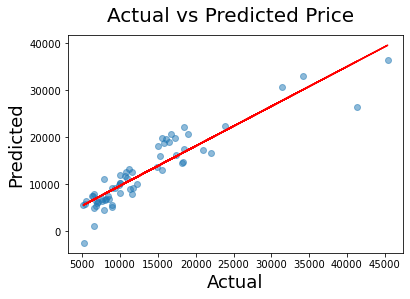

In [29]:
fig = plt.figure()
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red')
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('Actual vs Predicted Price', fontsize = 20)    # Plot heading 
plt.xlabel('Actual', fontsize = 18)                         # X-label
plt.ylabel('Predicted', fontsize = 18)                      # y-label
plt.show()

### Predicting Results without using PCA

### Splitting Data for Training and Testing

In [32]:
data = df.values
X,y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)  # splitting in the ration 70:30

### Model

In [33]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

### Making Predictions and Checking Accuracy

In [34]:
y_pred = regr.predict(X_test)

In [35]:
print('R2 Score (without using PCA):',r2_score(y_test, y_pred))

R2 Score (without using PCA): 0.7961110382079447


### Hence, using PCA is a more effective method.